# Exercício 6

SCC5809 - Redes Neurais Artificiais e Aprendizado Profundo

**Nome**:  - **NUSP**: 

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
optimizers_cases = ['adagrad', 'rmsprop', 'adam']

In [ ]:
histories = []
histories_drop = []
for opt in optimizers_cases:
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
  histories.append(history)

  model_drop = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 3), filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

  model_drop.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  history_drop = model_drop.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
  histories_drop.append(history_drop)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.1288 - loss: 2.2953 - val_accuracy: 0.1886 - val_loss: 2.2444
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 53ms/step - accuracy: 0.2142 - loss: 2.1846 - val_accuracy: 0.2840 - val_loss: 1.9899
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.2958 - loss: 1.9576 - val_accuracy: 0.3240 - val_loss: 1.8927
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.3320 - loss: 1.8633 - val_accuracy: 0.3555 - val_loss: 1.8109
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.3578 - loss: 1.7999 - val_accuracy: 0.3681 - val_loss: 1.7527
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.3791 - loss: 1.7362 - val_accuracy: 0.3799 - val_loss: 1.7162
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.3879 - loss: 1.7082 - val_accuracy: 0.3974 - val_loss: 1.6743
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.4022 -

In [ ]:
def plotTrainingPerformance(history, history_drop, models_names):
  epochs_vec = [i for i in range(len(history[0].history['loss']))]
  for i in range(len(history)):
    plt.plot(epochs_vec, history[i].history['accuracy'], label=models_names[i])
    plt.plot(epochs_vec, history_drop[i].history['accuracy'], label=models_names[i] + ' + dropout')

  plt.legend(title='Optimizers')
  plt.legend(loc='lower right')
  plt.title('Accuracy over epochs (Training)')
  plt.tight_layout()
  plt.show(True)
  return

In [ ]:
def plotValidationPerformance(history, history_drop, models_names):
  epochs_vec = [i for i in range(len(history[0].history['loss']))]
  for i in range(len(history)):
    plt.plot(epochs_vec, history[i].history['val_accuracy'], label=models_names[i])
    plt.plot(epochs_vec, history_drop[i].history['val_accuracy'], label=models_names[i] + ' + dropout')

  plt.legend(title='Optimizers')
  plt.legend(loc='lower right')
  plt.title('Accuracy over epochs (Validation)')
  plt.tight_layout()
  plt.show(True)
  return

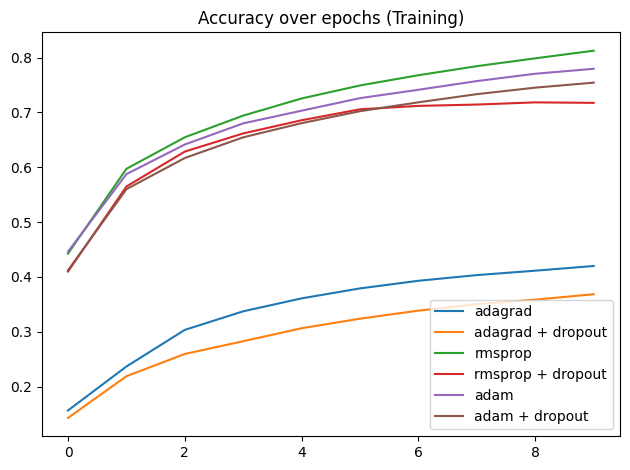

In [ ]:
plotTrainingPerformance(histories, histories_drop, optimizers_cases)

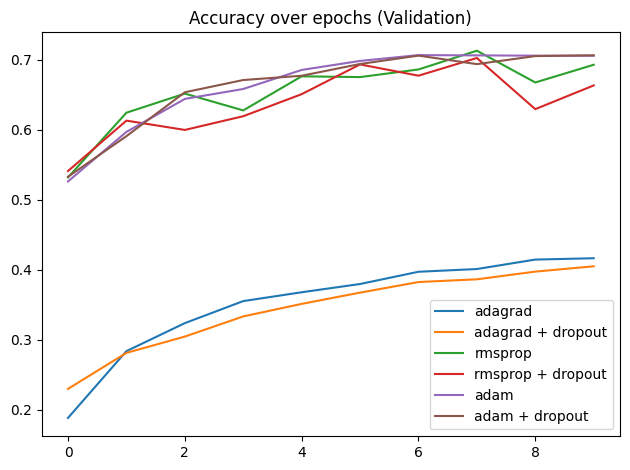

In [ ]:
plotValidationPerformance(histories, histories_drop, optimizers_cases)